In [2]:
!pip install keras

    100% |################################| 307kB 2.9MB/s ta 0:00:01
    100% |################################| 276kB 3.2MB/s ta 0:00:01
    100% |################################| 51kB 8.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /root/.cache/pip/wheels/ad/da/0c/74eb680767247273e2cf2723482cb9c924fe70af57c334513f
Successfully built pyyaml
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import numpy as np
import os
import sklearn
import tensorflow as tf

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda, Dropout
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg

from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import Nadam

Using TensorFlow backend.


In [3]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions

from keras.layers import AveragePooling2D
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# def add_new_last_layer(base_model, nb_classes):
#     x = base_model.output
#     x = AveragePooling2D((8, 8), border_mode='valid', name='avg_pool')(x)
#     x = Dropout(0.4)(x)
#     x = Flatten()(x)
#     model = Model(input=base_model.input, output=x)
#     return model

In [5]:
cnn_base = VGG16(input_shape=(224,224,3),include_top=True,weights='imagenet')
# We'll extract features at the final pool layer.
model = Model(
    inputs=cnn_base.input,
    outputs=cnn_base.get_layer('fc1').output
)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
def extract(image_path,model):
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        features = model.predict(x)
        return features[0]

In [8]:
from PIL import Image
rel_dir = "/storage/"
#rel_dir = ""
batch_sz = 30

In [9]:
os.listdir(rel_dir+"/split_images")

['Aug 11th Decaying Ice',
 'Sept 5th Helicopter',
 'Aug 28th Stopped Ram Ice',
 'Aug 15th Ice Under Pressure',
 'Discoloured Ice',
 'Aug 16th-17th Helicopter',
 'Aug 20th-26th',
 'Aug 14th Decaying',
 'Sept 8th Swell',
 'Aug 29th-30th',
 'Aug 10th Decaying Ice Stopped Luis']

In [10]:
labels = []
image_features = []

labels_test = []
image_features_test = []

for label in os.listdir(rel_dir+"/split_images"):
    listdir = np.array(sorted(os.listdir(rel_dir+"/split_images/"+label),key=lambda x: int(x.split(".")[0])))
    print(label,len(listdir))
    batch_sz = 30
    stride = 3
    features = []
    labs = []
    label_batches = []
    for file in listdir:
        features.append(np.array(extract(rel_dir+"/split_images/"+label+'/'+file,model)))
    print("Done processing features")
    for i in range(0,len(listdir),stride):
        if(np.array(features[i:i+stride*batch_sz:stride]).shape[0]!=batch_sz):
            continue
        label_batches.append(np.array(features[i:i+stride*batch_sz:stride]))
        #print(np.array(features[i:i+batch_sz]).shape)
        labs.append(label)
    X_train,X_test,y_train,y_test = train_test_split(label_batches,labs,shuffle=False,test_size=0.3)
    image_features = image_features + X_train
    labels = labels + y_train
    
    labels_test = labels_test + y_test
    image_features_test = image_features_test + X_test

Aug 11th Decaying Ice 2439
Done processing features
Sept 5th Helicopter 1490
Done processing features
Aug 28th Stopped Ram Ice 2979
Done processing features
Aug 15th Ice Under Pressure 1265
Done processing features
Discoloured Ice 676
Done processing features
Aug 16th-17th Helicopter 1309
Done processing features
Aug 20th-26th 1213
Done processing features
Aug 14th Decaying 1106
Done processing features
Sept 8th Swell 1862
Done processing features
Aug 29th-30th 3536
Done processing features
Aug 10th Decaying Ice Stopped Luis 2279
Done processing features


In [11]:
image_features = np.array(image_features)
image_features_test = np.array(image_features_test)

In [12]:
print(image_features.shape)
print(image_features_test.shape)

(4477, 30, 4096)
(1926, 30, 4096)


In [13]:
num_labels = len(np.unique(labels))

In [14]:
# permutation = np.random.permutation(len(images))
# images = images[permutation]
# labels = labels[permutation]
# image_list = [0] * len(images)
# labels_list = [0]*len(labels)
# for idx,i in enumerate(permutation):
#     image_list[idx] = images[i]
#     labels_list[idx] = labels[i]

In [15]:
num_of_train_examples = image_features.shape[0]
print(num_of_train_examples)
# datagen = ImageDataGenerator(rotation_range=90,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

4477


In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [17]:
le.fit(list(labels))
le_labels = le.transform(labels)
le_labels_test = le.transform(labels_test)
#le_labels_test = le.transform(labels_test)
one = preprocessing.OneHotEncoder()
one.fit(list(le_labels.reshape(-1,1)))
one_labels = one.transform(le_labels.reshape(-1,1))
one_labels_test = one.transform(le_labels_test.reshape(-1,1))

In [18]:
one_labels_test.shape

(1926, 11)

In [19]:
image_f = np.zeros((len(image_features),30,4096))
for idx in range(image_features.shape[0]):
    print(idx)
    #print(image_f[idx].shape,image_features[idx].shape)
    image_f[idx] = image_features[idx]
image_f_test = np.zeros((len(image_features_test),30,4096))
for idx in range(image_features_test.shape[0]):
    print(idx)
    #print(image_f_test[idx].shape,image_features_test[idx].shape)
    image_f_test[idx] = image_features_test[idx]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118


3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830


1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321


In [20]:
model_lstm = Sequential()
model_lstm.add(LSTM(30,input_shape=(30, 4096)))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(30))
model_lstm.add(Dense(num_labels,activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model_lstm.save_weights('vgg-model.h5')

In [21]:
# model_lstm.fit(image_f, one_labels, epochs=5, verbose=2)

In [22]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
validation_cvscores = []
test_cvscores = []
epochs = 1
for train, test in kf.split(image_f):
    model_lstm.load_weights('vgg-model.h5')
    hist = model_lstm.fit(image_f[train], one_labels[train], epochs=5, verbose=0)
    print(hist.history)
    val_score = model_lstm.evaluate(image_f[test], one_labels[test], verbose=0)
    test_score = model_lstm.evaluate(image_f_test, one_labels_test, verbose=0)
    validation_cvscores.append(val_score)
    test_cvscores.append(test_score)

{'loss': [2.4371561582167174, 2.3268117069695067, 2.300444408574392, 2.305985135989498, 2.302782405425787], 'acc': [0.13626209974333323, 0.16778356914604292, 0.17150657733851019, 0.17498138492576062, 0.17299578058886805]}
{'loss': [2.397368552815562, 2.3218651135052424, 2.304360395922913, 2.294877301495671, 2.2944657655826246], 'acc': [0.13030528666978144, 0.14941672868351688, 0.18168279961339592, 0.1737403822769211, 0.17671878880352618]}
{'loss': [2.4522493283841533, 2.3432413006751998, 2.3127487217649154, 2.304997157506121, 2.3004020586532175], 'acc': [0.12980888560358836, 0.15289153640946018, 0.1672871680280712, 0.17324398112936154, 0.1779597915106167]}
{'loss': [2.426585749912333, 2.3475087213883126, 2.3198918842979386, 2.3071966548805114, 2.3068974843596846], 'acc': [0.14420451724623948, 0.16108215434745335, 0.1605857532812603, 0.16679076698776746, 0.1732439811848387]}
{'loss': [2.363525744436041, 2.3168046976266057, 2.306617637223835, 2.3004096389319826, 2.302792554873336], 'acc'

In [23]:
val_acc = []
for a,b in validation_cvscores:
    #print(a,b)
    val_acc.append(b)
test_acc = []    
for a,b in test_cvscores:
    #print(a,b)
    test_acc.append(b)

In [24]:
print("Validation Mean Accuracy",np.mean(val_acc))
print("Test Mean Accuracy",np.mean(test_acc))

Validation Mean Accuracy 0.17980185362735698
Test Mean Accuracy 0.17912772585669784


In [25]:
print("Validation Standard Deviation",np.std(val_acc))
print("Test Standard Deviation",np.std(test_acc))

Validation Standard Deviation 0.013067913531922236
Test Standard Deviation 2.7755575615628914e-17


Text(0,0.5,'Categorial Cross Entropy')

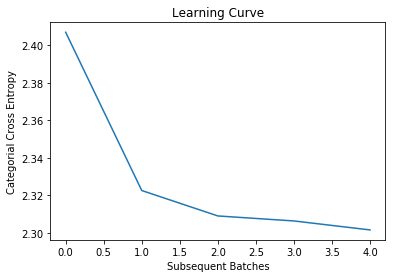

In [26]:
plt.plot(hist.history['loss'])
plt.title("Learning Curve")
plt.xlabel('Subsequent Batches')
plt.ylabel('Categorial Cross Entropy')

In [29]:
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(np.array(validation_cvscores)[:,1]*100)
print(np.array(test_cvscores)[:,1]*100)
print(np.mean(np.array(validation_cvscores)[:,1]*100))
print(np.mean(np.array(test_cvscores)[:,1]*100))
print(np.std(np.array(validation_cvscores)[:,1]*100))
print(np.std(np.array(test_cvscores)[:,1]*100))

[16.96 18.08 17.63 19.20 17.19 19.64 19.87 18.79 15.66 16.78]
[17.91 17.91 17.91 17.91 17.91 17.91 17.91 17.91 17.91 17.91]
17.9801853627357
17.91277258566978
1.3067913531922233
0.0
